In [1]:
import cv2
import numpy as np
import requests
from PIL import Image

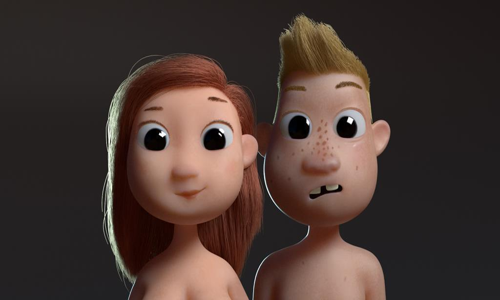

In [2]:
image=Image.open(requests.get('https://d1nslcd7m2225b.cloudfront.net/Pictures/1024x536/4/9/5/1320495_nofilterstillcourtesyoflevelk_270374_crop.jpg',stream=True).raw)
image_logow=image.resize((500,300))
image_textw=image.resize((500,300))
image_logow

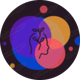

In [3]:
logo=Image.open("logo.png")
logo=logo.resize((80,80))
logo

In [4]:
image_logow=np.array(image_logow.convert('RGB'))
h_image,w_image,_=image_logow.shape
logo=np.array(logo.convert('RGB'))
h_logo,w_logo,_=logo.shape

In [5]:
h_image,w_image,h_logo,w_logo

(300, 500, 80, 80)

# getting the center of the original  image where i ll place the watermark

In [6]:
center_y = int(h_image / 2)
center_x = int(w_image / 2)
top_y = center_y - int(h_logo / 2)
left_x = center_x - int(w_logo / 2)
bottom_y = top_y + h_logo
right_x = left_x + w_logo

In [7]:
# Getting the region of interest ROI
roi=image_logow[top_y:bottom_y,left_x:right_x]
# Add the logo to the roi
result=cv2.addWeighted(roi,1,logo,0.5,0)
# Replace the ROI on the image
image_logow[top_y:bottom_y,left_x:right_x]=result

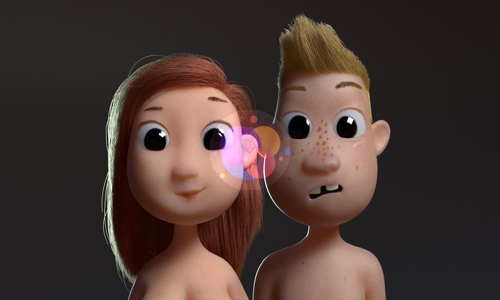

In [8]:
img=Image.fromarray(image_logow,'RGB')
img

In [15]:
# Text Watermark
image_text = np.array(image_textw.convert('RGB'))
cv2.putText(image_text, text='Houssem', org=(w_image - 95, h_image - 10), fontFace=cv2.FONT_HERSHEY_COMPLEX, fontScale=0.5,
            color=(128,128,128), thickness=1, lineType=cv2.LINE_4); 

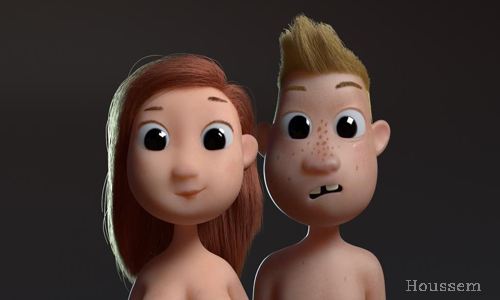

In [16]:
# Plotting text watermark image
timg = Image.fromarray(image_text, 'RGB')
timg